In [1]:
# DEV-c656c45b76fe02df536f0ce348eb602bcab9f1de

In [11]:
import dwave_networkx as dnx # contains the topologies of the dwave's quantum computers
import matplotlib.pyplot as plt
from dwave.cloud import Client
import pandas as pd
with Client.from_config() as client:
  available_solvers = client.get_solvers()

In [12]:
for solver in available_solvers:
  print(solver)

BQMSolver(id='hybrid_binary_quadratic_model_version2')
DQMSolver(id='hybrid_discrete_quadratic_model_version1')
CQMSolver(id='hybrid_constrained_quadratic_model_version1')
StructuredSolver(id='Advantage2_prototype2.3')
StructuredSolver(id='Advantage_system6.4')
StructuredSolver(id='Advantage_system4.1')


In [13]:
with Client.from_config() as client:
  solver = client.get_solver('Advantage_system6.4')   # SELECT THE SOLVER

In [4]:
print('Missing qubits: ', end= ' ')
for i in range(solver.properties['num_qubits']):
  if i not in solver.properties['qubits']:
    print(i, end=' ')
print('\nh range: ', solver.properties['h_range'])
print('J range: ', solver.properties['j_range'])

Missing qubits:  0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 104 119 616 727 742 771 1261 1450 1705 1905 1936 1996 2025 2850 2851 2852 2853 2854 2855 2856 2857 2858 2859 2860 2861 2862 2863 2864 2865 2866 2867 2868 2869 2870 2871 2872 2873 2874 2875 2876 2877 2878 2879 2880 2881 2882 2883 2884 2885 2886 2887 2888 2889 2890 2891 2892 2893 2894 2895 2896 2897 2898 2899 2900 2901 2902 2903 2904 2905 2906 2907 2908 2909 3042 3052 3069 3127 3204 3413 3422 3597 3852 4442 4666 4949 5207 5460 5685 5730 5731 5732 5733 5734 5735 5736 5737 5738 5739 5740 5741 5742 5743 5744 5745 5746 5747 5748 5749 5750 5751 5752 5753 5754 5755 5756 5757 5758 5759 
h range:  [-4.0, 4.0]
J range:  [-1.0, 1.0]


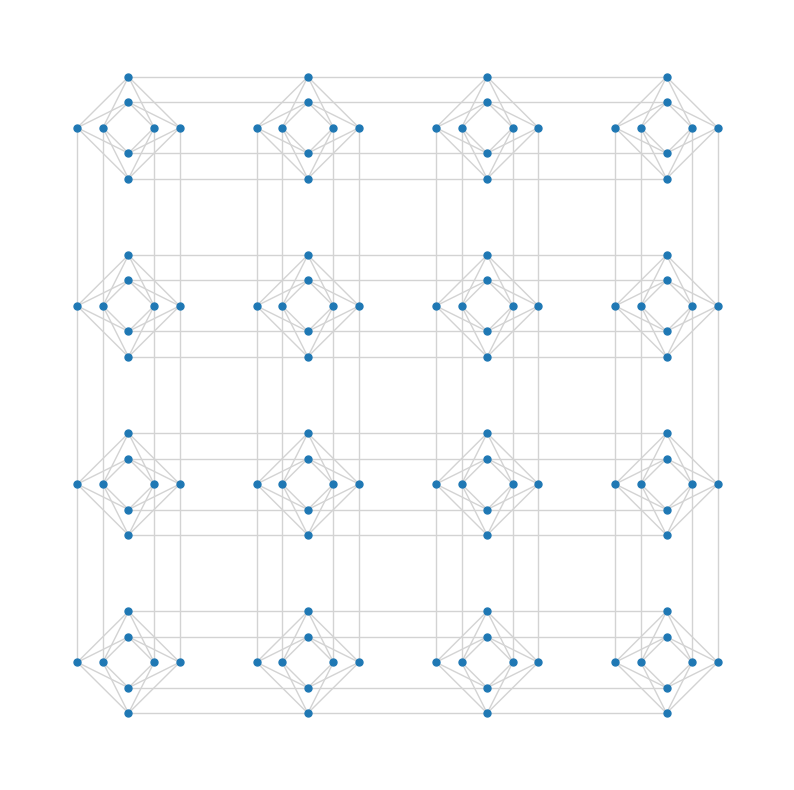

In [6]:
f, axes = plt.subplots(1, 1, figsize=(10,10))

# number of cells per side, each cell has 8 qubits
graph_size = 4

# The topology of the DWave 2000Q was the chimera graph
X = dnx.chimera_graph(graph_size)
dnx.draw_chimera(X, node_size=100/graph_size, edge_color='lightgrey', ax=axes)

plt.show()

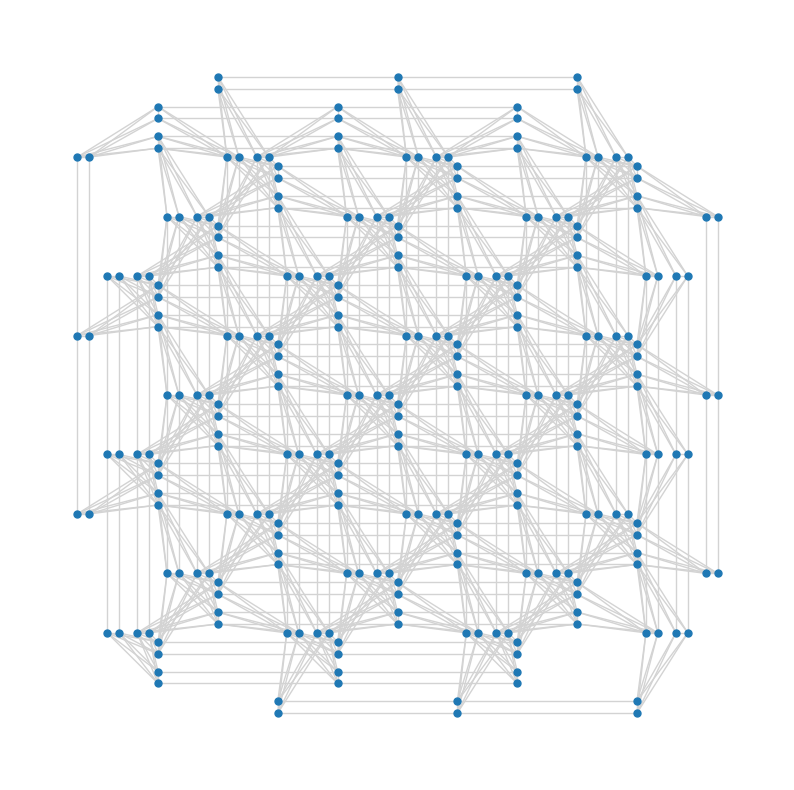

In [10]:
f, axes = plt.subplots(1, 1, figsize=(10,10))

graph_size = 4

X = dnx.pegasus_graph(graph_size)
dnx.draw_pegasus(X, node_size=100/graph_size, edge_color='lightgrey', ax=axes)

plt.show()

In [5]:
anneal_sc = pd.read_excel('09-1273A-D_Advantage_system6_4_annealing_schedule.xlsx',  'processor-annealing-schedule')
anneal_sc.head()

s  A(s) (GHz)  B(s) (GHz)  C (normalized)
0  0.000000    9.626948    0.231671        0.000000
1  0.001001    9.536236    0.233863        0.005172
2  0.002002    9.448135    0.236065        0.010123
3  0.003003    9.360092    0.238278        0.015069
4  0.004004    9.272797    0.240501        0.019954

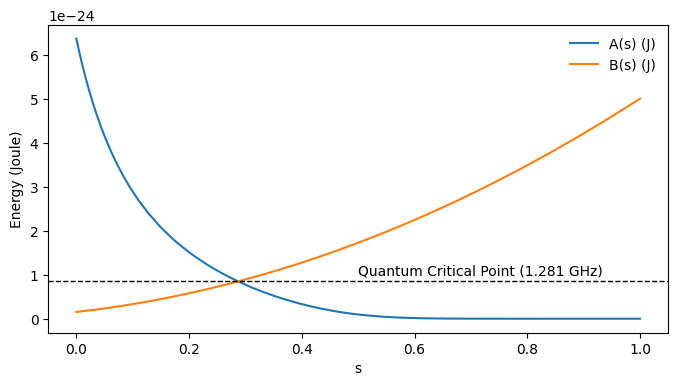

In [7]:
factor = 6.6260709e-25

anneal_sc['A(s) (J)'] = anneal_sc['A(s) (GHz)'] * factor
anneal_sc['B(s) (J)'] = anneal_sc['B(s) (GHz)'] * factor

fig, ax = plt.subplots(1,1, figsize=(8,4))

anneal_sc.plot(x='s', y=['A(s) (J)', 'B(s) (J)'], ax=ax)
plt.axhline(1.281 * factor, color='k', linestyle='dashed', linewidth=1)
plt.ylabel('Energy (Joule)')
plt.text(0.5,1.5*factor,'Quantum Critical Point (1.281 GHz)')
plt.legend(loc='best', frameon=False)
plt.savefig('annealing_schedule.pdf')

In [14]:
h = {
    0: 4.5,
    1: 2,
    2: -6
    }
J ={
    (0,1): 1,
    (1,2): 0.2,
    (2,0): -1.2
    }
print(solver.check_problem(h,J))

False


In [17]:
h={
    0: 1,
    1: 2,
    2: 3,
    3: 2.5
}

J={
    (0, 1): 0.1,
    (1, 2): 0.1,
    (2, 3): 0.2,
    (3, 0): 0.4,
}

# Let's see if you understood...
print(solver.check_problem(h,J))

False


- We need to pay attention to the missing qubits
- connecctivity
- bias/coupling ranges

In [18]:
from dwave.system import EmbeddingComposite, DWaveSampler
import dwave.inspector

h = {}
J = {
    (0, 1): 0.5,
    (1, 2): 0.2,
    (0, 2): -0.7
}

sampler = EmbeddingComposite(DWaveSampler(solver=solver.id))
N_reads = 100

response = sampler.sample_ising(h, J,
                                num_reads=N_reads,
                                label='My first fucking quantum problem',
                                return_embedding=True,
                                #annealing_time=
                                )

dwave.inspector.show((h, J), response) # helps visualizing the embedding

Serving Inspector on http://127.0.0.1:18000/?problemId=ab3c8214-6496-4913-abfd-501db8402528

'http://127.0.0.1:18000/?problemId=ab3c8214-6496-4913-abfd-501db8402528'

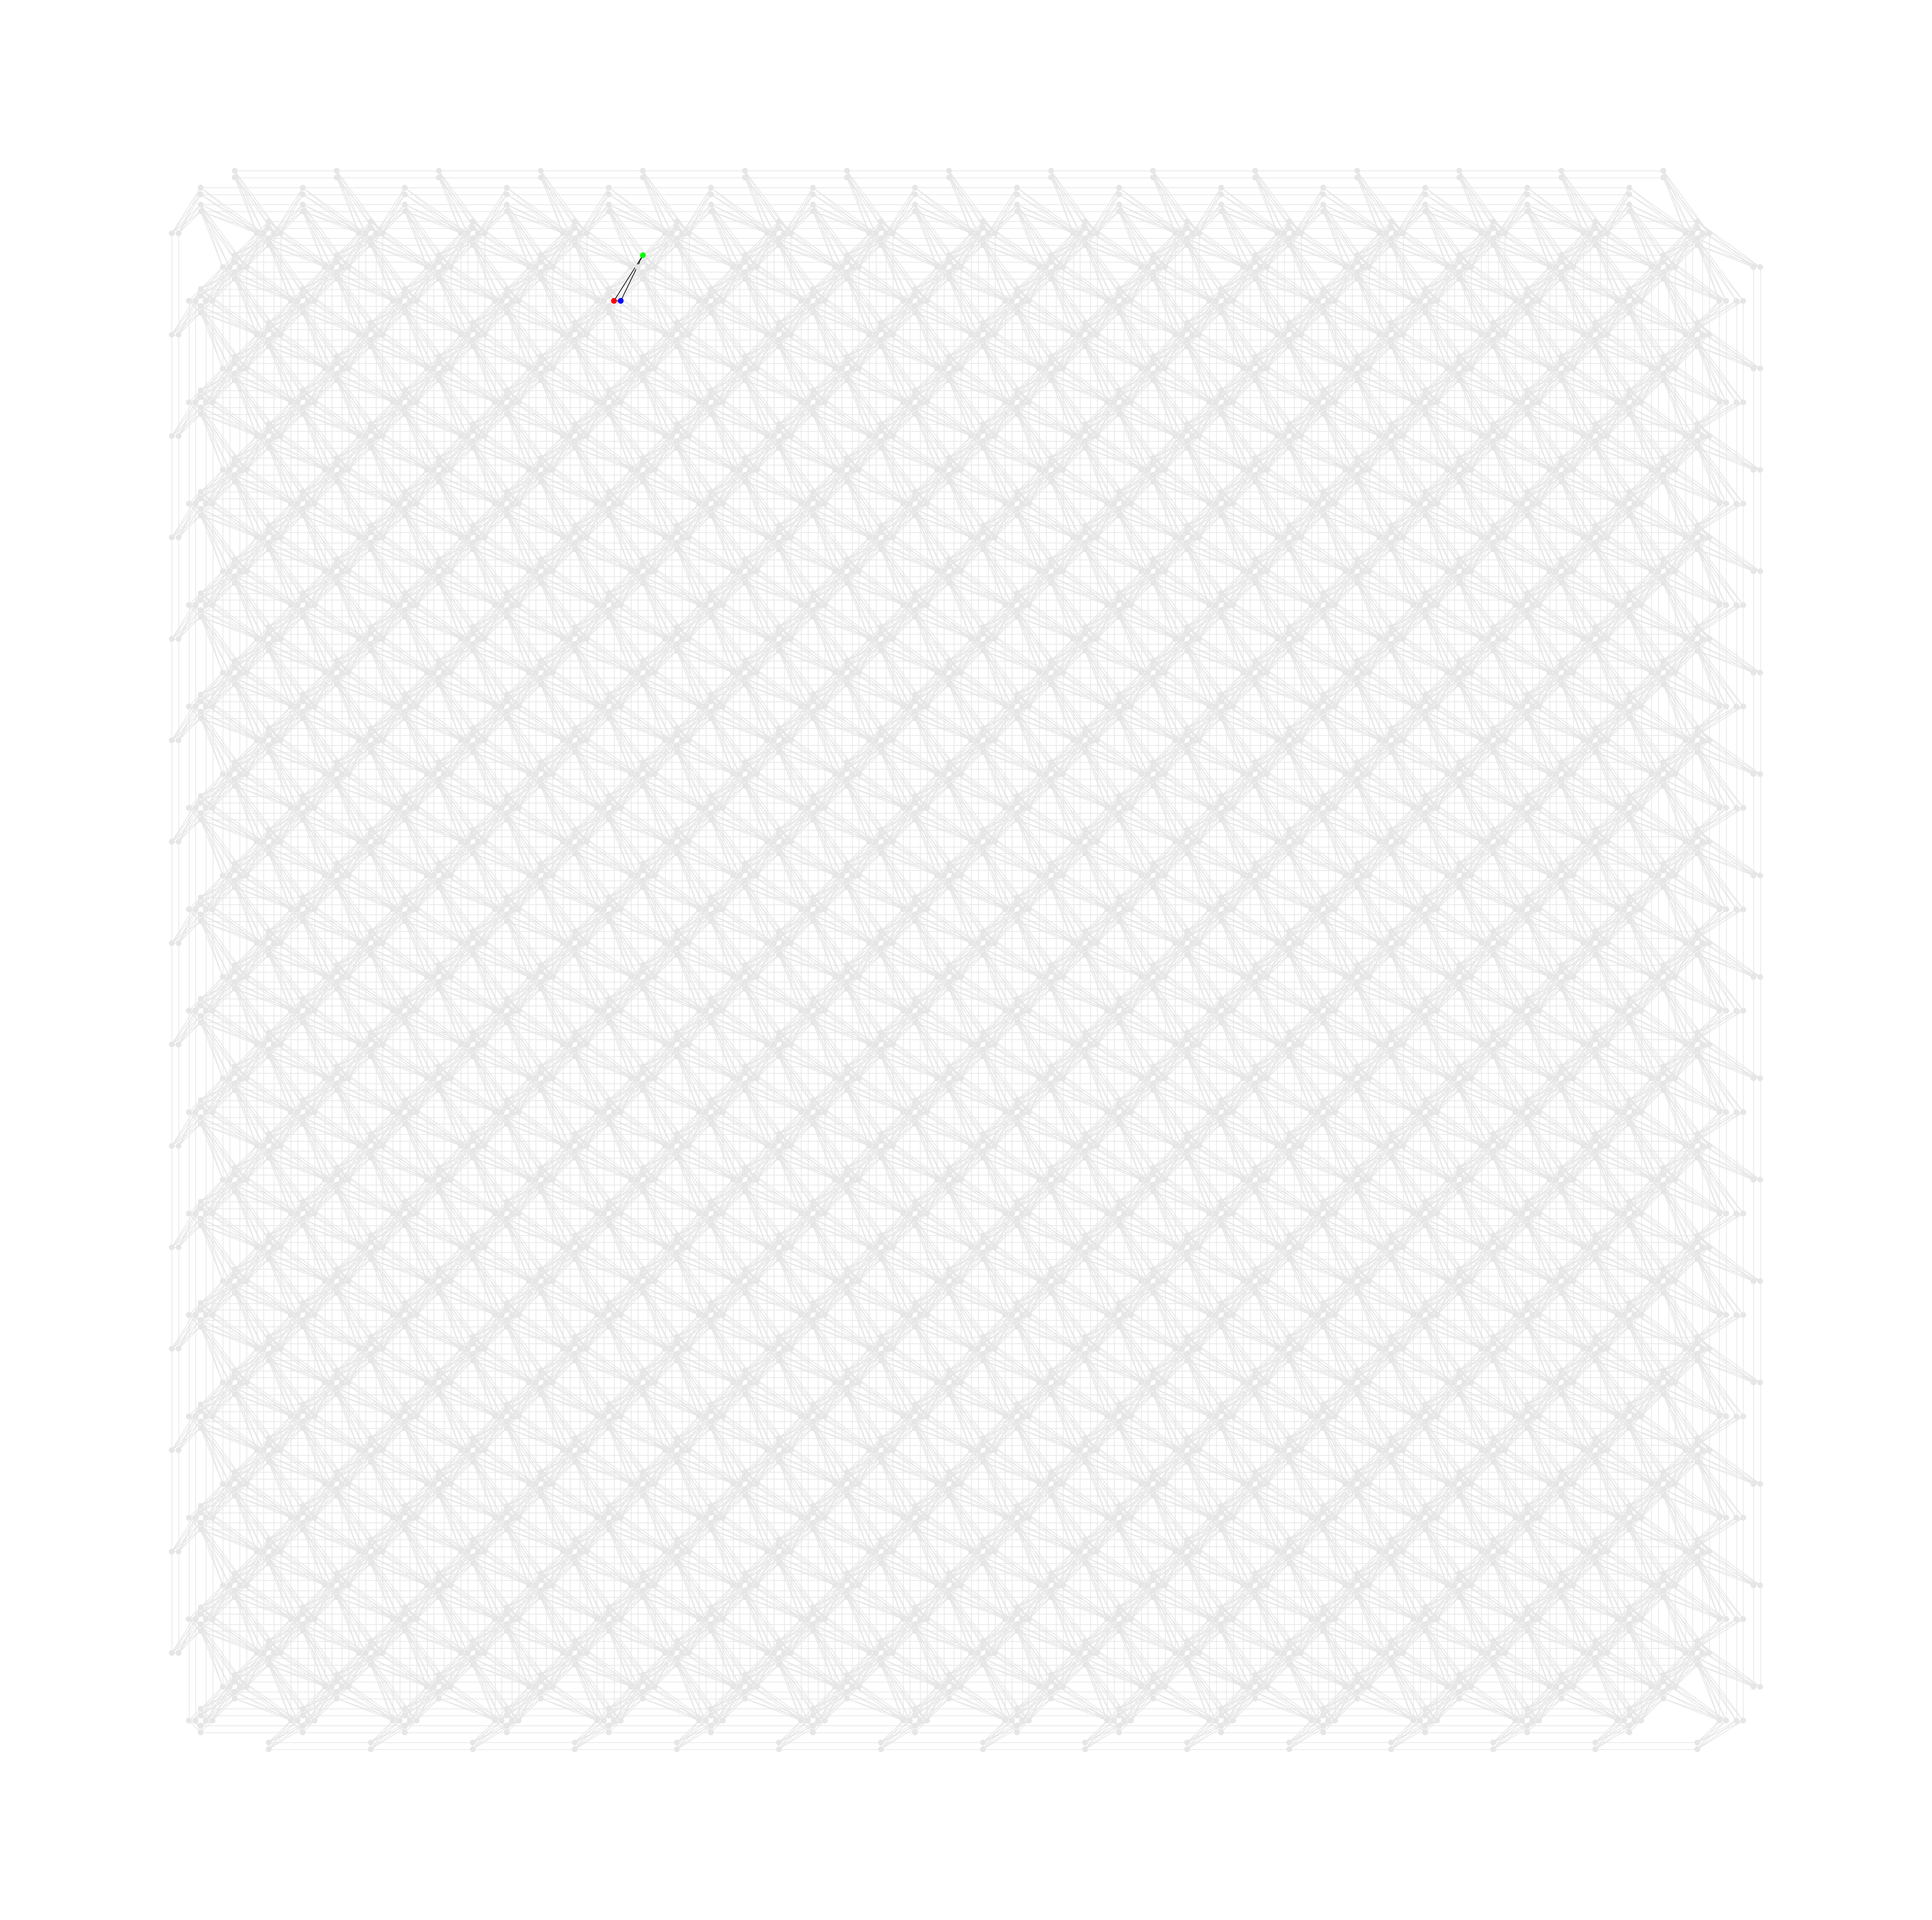

In [19]:
embedding = response.info['embedding_context']['embedding']
f, axes = plt.subplots(1, 1, figsize=(50,50))
X = dnx.pegasus_graph(16)
dnx.draw_pegasus_embedding(X, embedding, crosses=True, node_size=50, ax=axes)

In [20]:
for samp in response.data(['sample']):
  print(samp.sample)

{0: -1, 1: 1, 2: -1}
{0: 1, 1: -1, 2: 1}


In [21]:
import numpy as np
for conf, en, num in response.data(['sample','energy','num_occurrences']):
  print([conf[x] for x in conf])
  print('Energy=', en, '\tprob_res=',num*100/N_reads,'%\n')

[-1, 1, -1]
Energy= -1.4 	prob_res= 26.0 %

[1, -1, 1]
Energy= -1.4 	prob_res= 74.0 %
